In [ ]:
import os
import shutil
import glob

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
pip install Keras-Preprocessing

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 5.8 MB/s eta 0:00:00


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
from keras.layers import Dense, Flatten
from keras.models import Model
from keras.applications.inception_v3 import InceptionV3, preprocess_input
from keras_preprocessing.image import load_img
from keras_preprocessing.image import img_to_array
from keras.preprocessing.image import ImageDataGenerator
import keras

In [ ]:
base_model=InceptionV3(input_shape=(256,256,3), include_top=False)

87910968/87910968 [==============================] - 6s 0us/step


In [ ]:
for layer in base_model.layers:
  layer.trainable=False

In [ ]:
X= Flatten()(base_model.output)
X= Dense(units=6, activation='softmax')(X)

# Now, building the model
model=Model(base_model.input, X)

#Compliling the model

model.compile(optimizer='adam', loss=keras.losses.binary_crossentropy, metrics=['accuracy'])

#Summary
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 127, 127, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 127, 127, 32  96         ['conv2d[0][0]']                 
 alization)                     )                                                             

In [ ]:
#preprocess the data using data generator
train_datagen=ImageDataGenerator(featurewise_center= True,
                                 rotation_range=0.4,
                                 width_shift_range=0.3,
                                 horizontal_flip= True,
                                 preprocessing_function=preprocess_input,
                                 zoom_range=0.4,
                                 shear_range=0.4
                                 )
test_datagen=ImageDataGenerator(featurewise_center= True,
                                 rotation_range=0.4,
                                 width_shift_range=0.3,
                                 horizontal_flip= True,
                                 preprocessing_function=preprocess_input,
                                 zoom_range=0.4,
                                 shear_range=0.4
                                 )
train_data = train_datagen.flow_from_directory(directory="/content/drive/MyDrive/fruit_dataset/dataset/train",
                                               target_size=(256,256),
                                               batch_size=64)
test_data = test_datagen.flow_from_directory(directory="/content/drive/MyDrive/fruit_dataset/dataset/test",
                                               target_size=(256,256),
                                               batch_size=64)

Found 10255 images belonging to 7 classes.
Found 2667 images belonging to 7 classes.


In [ ]:
train_data.class_indices

{'Other': 0,
 'freshapples': 1,
 'freshbanana': 2,
 'freshoranges': 3,
 'rottenapples': 4,
 'rottenbanana': 5,
 'rottenoranges': 6}

In [ ]:
#Visualising the data
t_img, label= train_data.next()

/usr/local/lib/python3.10/dist-packages/keras/preprocessing/image.py:1861: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn(


In [ ]:
t_img.shape

(64, 256, 256, 3)

In [ ]:
def plotImages(img_arr, label):
  """
  input will be = image array
  output will be= plotted image
  """

  for idx, img in enumerate (img_arr):

    if idx <=10:
      plt.figure(figsize=(5,5))
      plt.imshow(img)
      plt.title(img.shape)
      plt.axis=False
      plt.show()


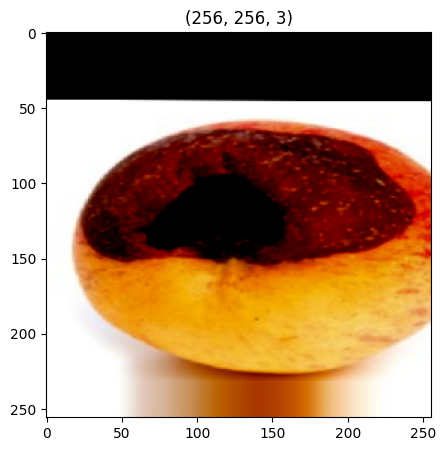

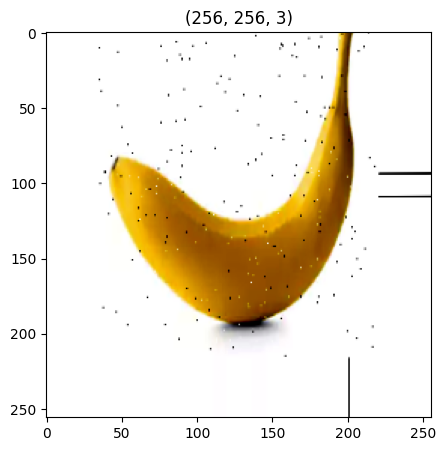

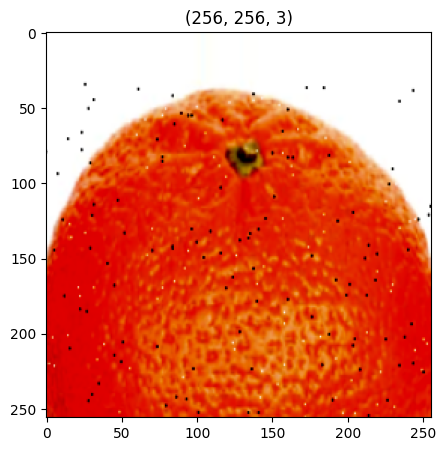

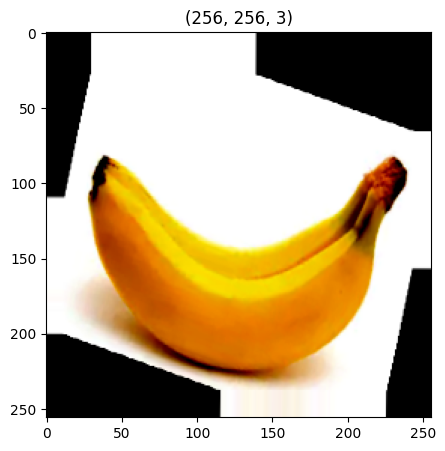

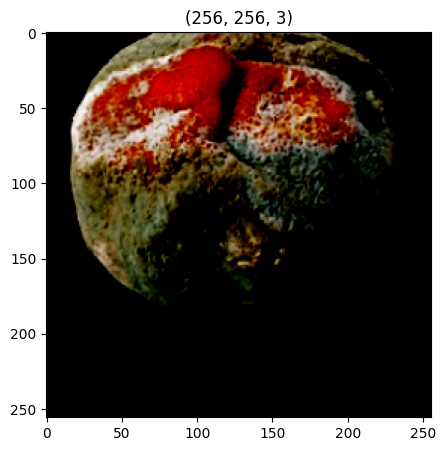

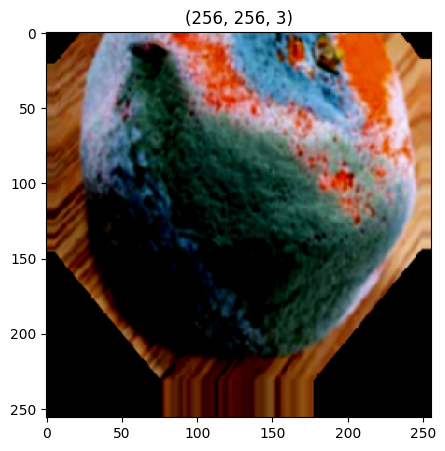

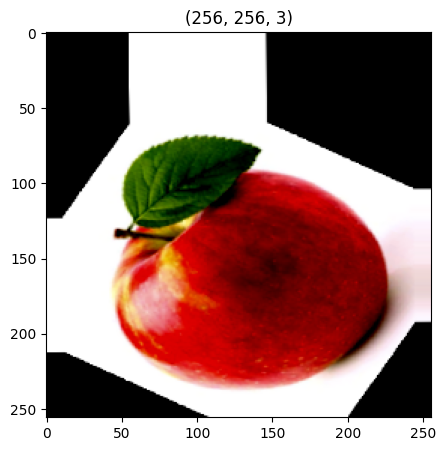

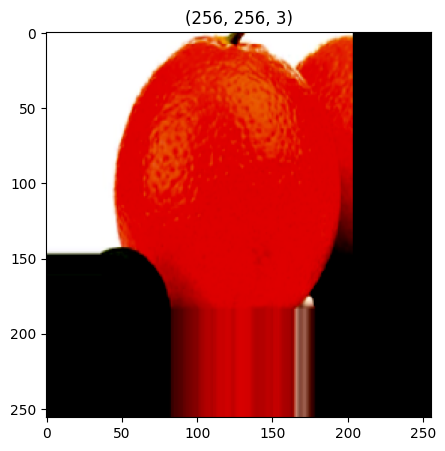

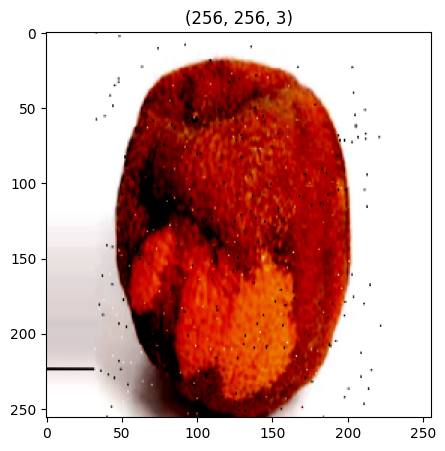

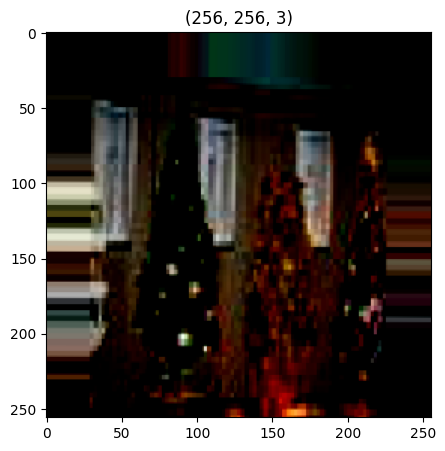

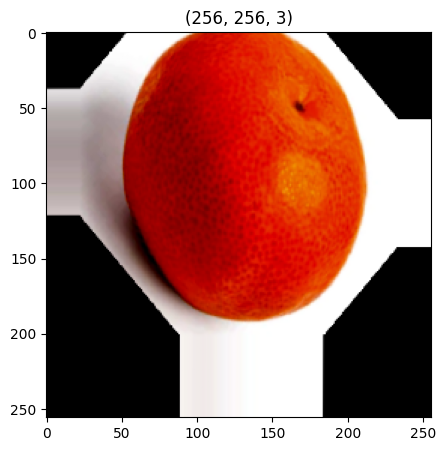

In [ ]:
plotImages(t_img, label)

In [ ]:
#Model check point
#Train the model
from keras.callbacks import ModelCheckpoint, EarlyStopping

mc=ModelCheckpoint(filepath="./best_model.h5",
                   monitor="accuracy",
                   verbose=1,
                   save_best_only=True)

es=EarlyStopping(monitor="accuracy",
                 min_delta=0.01,
                 patience=5,
                 verbose=1)

cb=[mc,es]

In [ ]:
his=model.fit_generator(train_data,
                        steps_per_epoch=10,
                        epochs=30,
                        callbacks=cb)

In [ ]:
"""
from tensorflow.keras.models import load_model
model.save('/content/drive/MyDrive/Saved models/InceptiovV3.h5')
"""

In [ ]:
#in this, we load the model
#from keras.models import load_model

#model=load_model(" path of the saved model")

from tensorflow.keras.models import load_model
new_model= load_model('/content/drive/MyDrive/Saved models/InceptiovV3.h5')

In [ ]:
h=his.history
h.keys()

dict_keys(['loss', 'accuracy'])

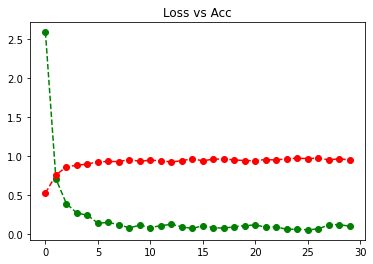

In [ ]:
plt.plot(h['loss'], 'go--')
plt.plot(h['accuracy'], 'go--', c="red")

plt.title("Loss vs Acc")
plt.show()

In [ ]:
"""
from tensorflow.keras.models import load_model
model.save('/content/drive/MyDrive/Saved models/InceptiovV3.h5')
"""

In [ ]:
# Now, we validate our model to see if it predicts the correct class or not
path="/content/drive/MyDrive/istockphoto-1157655660-612x612.jpg"
img= load_img(path, target_size=(256,256))

i=img_to_array(img)
i=preprocess_input(i)
input_arr=np.array([i])
input_arr.shape

pred=np.argmax(new_model.predict(input_arr))

if pred==0:
  print(" It is fresh apple")

elif pred==1:
  print(" It is fresh banana")

elif pred==2:
  print(" It is fresh orange")

elif pred==3:
  print(" It is rotten apple")

elif pred==4:
  print(" It is rotten banana")

elif pred==5:
  print(" It is rotten orange")

# Displaying the image
plt.imshow(input_arr[0])
plt.title(" input image")
plt.axis=False
plt.show()


In [ ]:
from tensorflow.keras.models import load_model
new_model= load_model('/content/drive/MyDrive/Saved models/InceptiovV3.h5')

In [ ]:
new_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 127, 127, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 127, 127, 32  96         ['conv2d[0][0]']                 
 alization)                     )                                                             

In [ ]:
new_model.get_weights()

[array([[[[-4.59105551e-01, -4.14526574e-02, -3.62577499e-03,
           -9.87672508e-02, -3.37070860e-02,  4.79929037e-02,
            2.32542142e-01,  3.23927671e-01,  5.90160079e-02,
            9.47738215e-02,  4.24996056e-02,  1.26620471e-01,
            1.33215979e-01,  1.22741833e-01, -7.92686343e-02,
            2.08227970e-02, -1.99647829e-01, -3.02687973e-01,
           -2.10659921e-01, -3.52898419e-01, -5.58023095e-01,
            3.20223093e-01,  4.53596050e-03, -3.09266411e-02,
           -6.86957911e-02,  2.00968519e-01,  1.14542745e-01,
            2.40372881e-01,  1.52943470e-02,  5.96231259e-02,
           -5.85714653e-02,  8.78173351e-01],
          [ 3.16376328e-01, -4.78494260e-03, -6.84681814e-03,
            7.44503662e-02, -1.97458476e-01,  5.20143658e-02,
           -1.24460436e-01,  3.36123914e-01,  3.01678218e-02,
           -1.26477107e-01, -1.05597451e-01, -5.31241074e-02,
           -2.43102223e-01,  1.66047230e-01, -1.03186309e-01,
           -6.55613691e-

In [ ]:
new_model.optimizer